In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


books = pd.read_csv("Books.csv")



books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']","['Pulitzer Prize for Fiction (1961)', 'Audie A...",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']","['Prometheus Hall of Fame Award (1984)', 'Locu...",https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",['Grammy Award Nominee for Best Spoken Word Al...,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']","[""Mythopoeic Fantasy Award for Children's Lite...",https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']","['Keith Barker Millennium Book Award', 'Books ...",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,3.87,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",NaN,https://www.goodreads.com/book/show/244261.The...
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,4.13,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",['Prix du Meilleur Livre Étranger for Roman (1...,https://www.goodreads.com/book/show/4645.The_S...
993,993,Riddley Walker,Russell Hoban,7075,819,4.02,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']","['Nebula Award Nominee for Best Novel (1982)',...",https://www.goodreads.com/book/show/428.Play_I...
994,994,Play It As It Lays,Joan Didion,29879,2278,3.88,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",NaN,https://www.goodreads.com/book/show/776573.Rid...


In [31]:
max_rating = books['Rating Value'].max()
min_rating = books['Rating Value'].min()
range_of_ratings = max_rating - min_rating

books['minmax_norm_ratings'] = round(1 + 9*((books['Rating Value'] - min_rating)/range_of_ratings) , 3)

mean_rating = books['Rating Value'].mean()

books['mean_norm_ratings'] = round(1 + 9*((books['Rating Value'] - mean_rating)/range_of_ratings) , 3)

In [32]:
dr = books[["Title", "1st Pub", 'minmax_norm_ratings']]
dr

,Title,1st Pub,minmax_norm_ratings
0,To Kill a Mockingbird,1960.0,7.705
1,1984,1949.0,7.161
2,The Great Gatsby,1925.0,5.591
3,Harry Potter and the Sorcerer's Stone,1997.0,8.913
4,"The Hobbit, or There and Back Again",1937.0,7.705
...,...,...,...
991,The Snows of Kilimanjaro and Other Stories,1961.0,5.228
992,The Street of Crocodiles,1933.0,6.799
993,Riddley Walker,1980.0,6.134
994,Play It As It Lays,1970.0,5.289


In [66]:
print(books['minmax_norm_ratings'])

0      7.705
1      7.161
2      5.591
3      8.913
4      7.705
       ...  
991    5.228
992    6.799
993    6.134
994    5.289
995    6.376
Name: minmax_norm_ratings, Length: 996, dtype: float64


In [92]:
dyear = dr.groupby("1st Pub").agg({"minmax_norm_ratings": [lambda x: np.mean(x)]})
dyear.columns = ["Mean of norm ratings"]

dyear['publishing year'] = dyear.index

#dyear = dyear.style.hide_index()

#books['1st Pub'] = books['1st Pub'].astype(int)

dyear

,Mean of norm ratings,publishing year
1st Pub,,
1900.0,3.718000,1900.0
1901.0,6.134333,1901.0
1902.0,6.557000,1902.0
1903.0,6.517000,1903.0
1904.0,5.167500,1904.0
...,...,...
1998.0,6.169955,1998.0
1999.0,6.220476,1999.0
2000.0,6.299579,2000.0


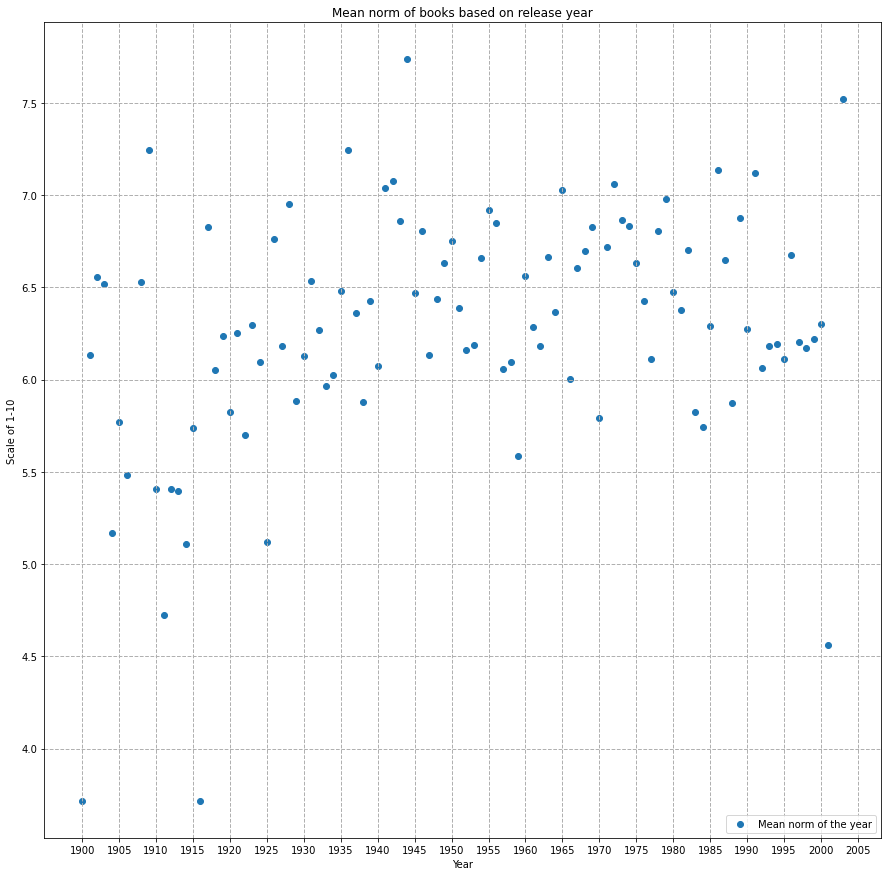

In [88]:
#pubyear = dr["1st Pub"].tolist()
#meannorm = books['minmax_norm_ratings'].tolist()


pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))
plt.show()

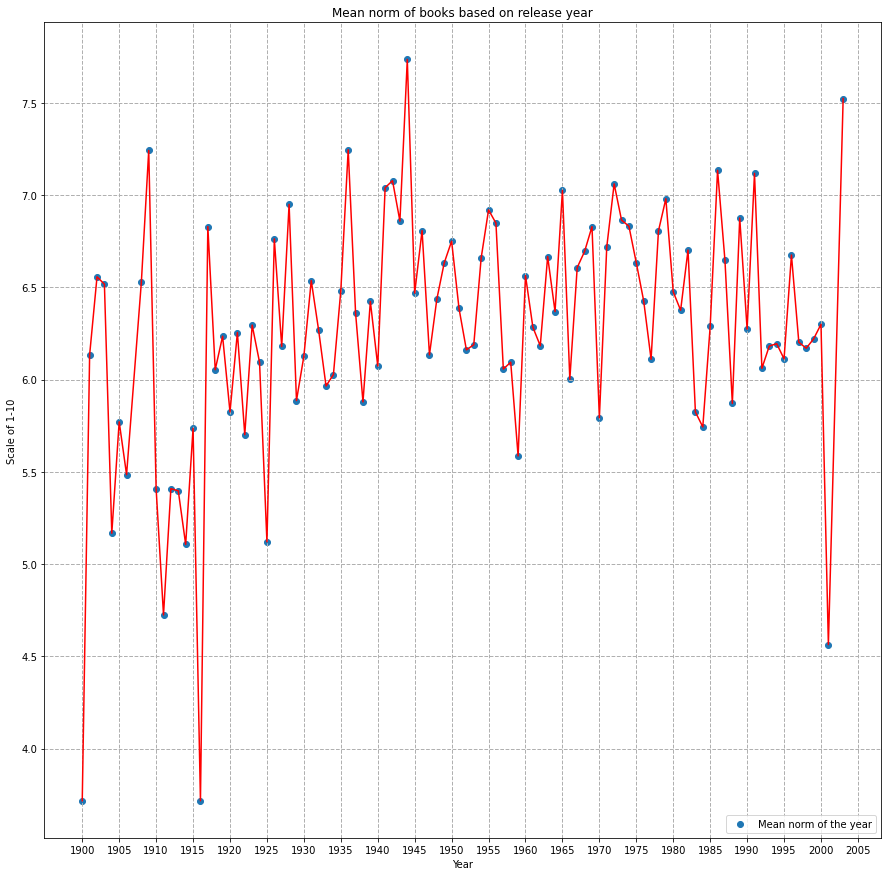

In [89]:
pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.plot(pubyear, meannorm, color='red')
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))
plt.show()